In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/Users/eshanakshata/Desktop/Salary_Data.csv')

In [31]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [32]:
# Create a linear regression model
model = LinearRegression()
model.fit(df[['YearsExperience']], df['Salary'])

LinearRegression()

In [33]:
# Predict Salary for a given Years of Experience
years_experience = np.array([6.5]).reshape(-1, 1)  # Example years of experience
salary_pred = model.predict(years_experience)
print(f"Predicted Salary for {years_experience[0][0]} Years of Experience: {salary_pred[0]}")

Predicted Salary for 6.5 Years of Experience: 87216.95528812669


/Users/eshanakshata/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


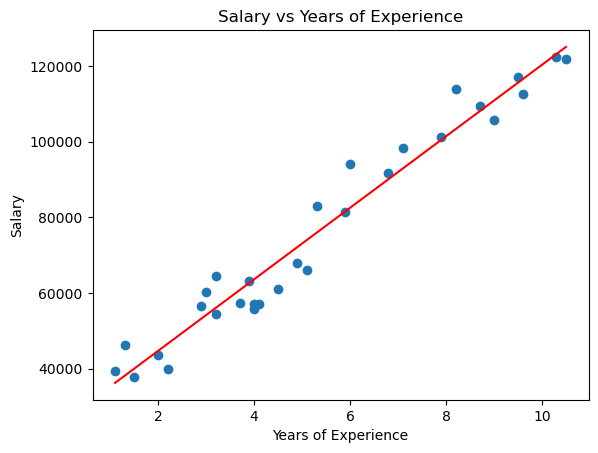

In [34]:
# Plot the data and the linear regression line
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(df['YearsExperience'], model.predict(df[['YearsExperience']]), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()


In [35]:
# Transformational models
transformations = ['None', 'log', 'sqrt']
for transformation in transformations:
    if transformation == 'None':
        X = df[['YearsExperience']]
    elif transformation == 'log':
        X = np.log(df[['YearsExperience']])
    elif transformation == 'sqrt':
        X = np.sqrt(df[['YearsExperience']])

    model.fit(X, df['Salary'])
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(df['Salary'], y_pred))
    print(f"RMSE for {transformation} transformation: {rmse}")

RMSE for None transformation: 5592.043608760661
RMSE for log transformation: 10302.893706228302
RMSE for sqrt transformation: 7080.095734983039


In [36]:
#None Transformation: RMSE of 5592.04. This is the baseline model without any transformation. 
#It indicates the performance of the linear regression model on the original data.

In [37]:
#Log Transformation: RMSE of 10302.89. This transformation seems to have worsened the model's performance. 
#likely because the relationship between YearsExperience and Salary is not well-suited for logarithmic transformation.

In [38]:
#Square Root Transformation: RMSE of 7080.10. This transformation has also worsened the model's performance compared to the baseline. 
#It suggests that the relationship between YearsExperience and Salary is not well-represented by a square root transformation.



In [ ]:
#In this case, the None Transformation (no transformation) resulted in the lowest RMSE.
#indicating that the original linear relationship between YearsExperience and Salary is the most suitable for this dataset.